In [38]:
import pandas as pd
import matplotlib.pyplot as plt

ddir = "universe_8/"
data = pd.read_csv(ddir + 'combined_stars.csv')

Name, X_stars, Y_stars, rad_velocity, parallax = data["Name"] , data["X"], data["Y"], data["RadialVelocity"], data["Parallax"]


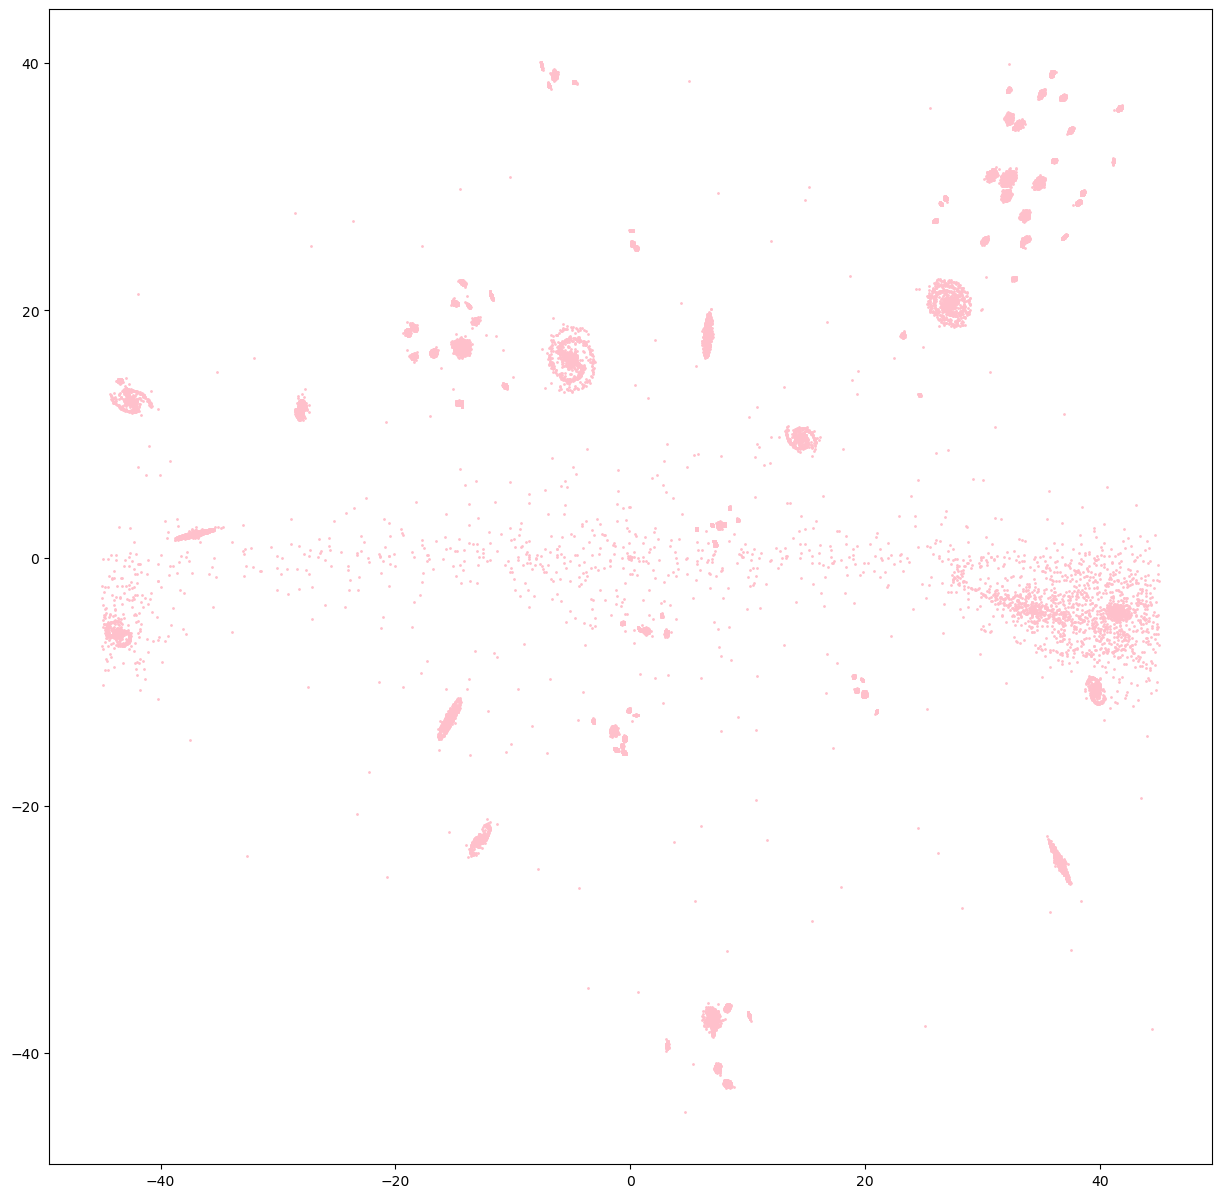

In [48]:
# take the index of the star iff it's above a certain parallax - try to get the far stars
star_index = [i for i, x in enumerate(parallax) if x <= 0.1]

# find the X and Y pos of the respctive indexes of the far away stars
X_pos = [X_stars[i] for i in star_index]  
Y_pos = [Y_stars[i] for i in star_index]


# plot
fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(X_pos, Y_pos, s=1, c='pink') 
ax.set_facecolor('k')

ax.set_facecolor('white')   
plt.show()  


C:\Users\neha\AppData\Local\Temp\ipykernel_32292\4100405943.py:4: RuntimeWarning: divide by zero encountered in divide
  distance = (1 / parallax)


[-1000.                    inf            inf ...           -inf
           -inf    23.25581395]


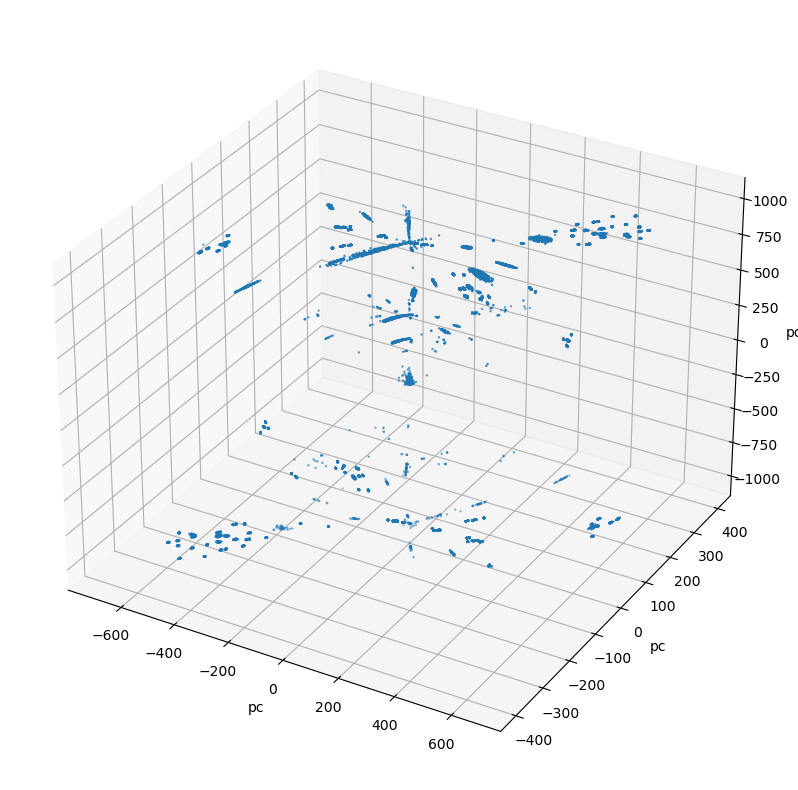

In [43]:
import numpy as np  
 
parallax = np.array(parallax[star_index])
distance = (1 / parallax)

x_rad, y_rad = np.radians(X_pos), np.radians(Y_pos) 
x = distance * np.cos(x_rad) * np.sin(y_rad)
y = distance * np.sin(x_rad) * np.sin(y_rad)
z = distance * np.cos(y_rad)

fig = plt.figure(figsize=(10, 10));  
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=0.5)
ax.set_xlabel('pc')
ax.set_ylabel('pc') 
ax.set_zlabel('pc')
print(distance)

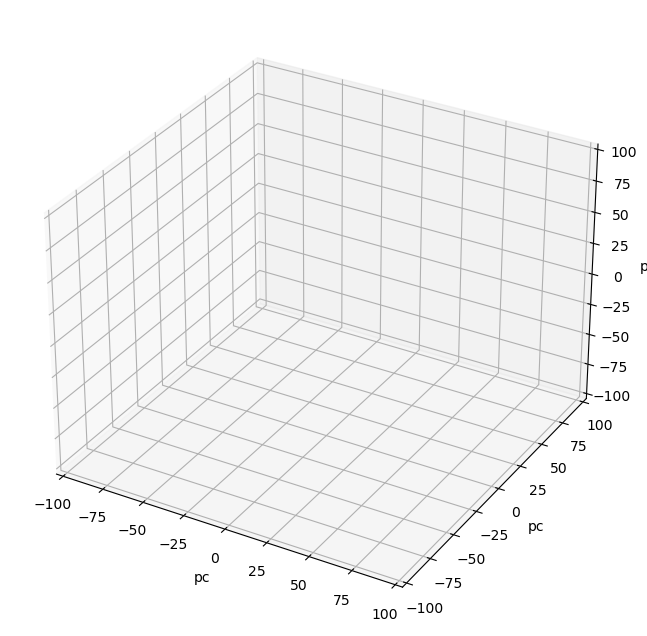

In [25]:


closeindexes =  [i for i, x in enumerate(parallax) if x > 0.001] # restriction step

closex = x[closeindexes]; closey = y[closeindexes]; closez = z[closeindexes]; # get the XYZ of close stars
fig = plt.figure(figsize=(8, 8));  # and now plot
ax = fig.add_subplot(projection='3d')
ax.scatter(closex, closey, closez, s=0.5); 
ax.set_xlabel('pc'); ax.set_ylabel('pc'); ax.set_zlabel('pc');
ax.set_xlim([-100, 100]); ax.set_ylim([-100, 100]); ax.set_zlim([-100, 100]); # we want some equal axis limits so things are proportional
plt.show()
